In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
df=pd.read_csv("data_2_var.csv")

In [16]:
df.columns =["input","target"]

In [17]:
df.head()

,input,target
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000


In [18]:
df.tail()

,input,target
1105,-115.366669,121.000000
1106,-119.954237,123.609122
1107,-109.942155,127.197394
1108,-111.515368,128.170885
1109,-110.344221,123.087950


In [19]:
df.shape

(1110, 2)

In [78]:
df.ndim

2

In [20]:
df.describe()

,input,target
count,1110.000000,1110.000000
mean,6.899714,-26.093318
std,79.324069,69.755980
min,-134.962839,-132.422167
25%,-53.366669,-76.994298
50%,15.739103,-46.036319
75%,76.193907,7.598960
max,134.605775,134.425495


In [39]:
df["target"].unique

<bound method Series.unique of 0      -129.938929
1      -130.141832
2      -125.760932
3      -112.785214
4      -116.000000
           ...    
1105    121.000000
1106    123.609122
1107    127.197394
1108    128.170885
1109    123.087950
Name: target, Length: 1110, dtype: float64>

In [40]:
df["input"].unique

<bound method Series.unique of 0      -121.531419
1      -134.917019
2      -120.605951
3      -129.894781
4      -134.366669
           ...    
1105   -115.366669
1106   -119.954237
1107   -109.942155
1108   -111.515368
1109   -110.344221
Name: input, Length: 1110, dtype: float64>

In [21]:
df.info

<bound method DataFrame.info of            input      target
0    -121.531419 -129.938929
1    -134.917019 -130.141832
2    -120.605951 -125.760932
3    -129.894781 -112.785214
4    -134.366669 -116.000000
...          ...         ...
1105 -115.366669  121.000000
1106 -119.954237  123.609122
1107 -109.942155  127.197394
1108 -111.515368  128.170885
1109 -110.344221  123.087950

[1110 rows x 2 columns]>

In [22]:
df["input"].value_counts()

-125.366669    10
 112.633331     8
 80.633331      5
-124.366669     4
-119.366669     4
               ..
 35.282362      1
 41.990995      1
 62.315768      1
 58.386909      1
-110.344221     1
Name: input, Length: 990, dtype: int64

In [23]:
df["target"].value_counts()

-95.000000     19
-32.000000     10
 131.000000     9
-33.000000      8
-78.000000      6
               ..
-20.326680      1
-23.000000      1
-27.951891      1
-6.151725       1
 123.087950     1
Name: target, Length: 968, dtype: int64

In [25]:
df["input"].isna().sum()

0

In [26]:
df["target"].isna().sum()

0

In [27]:
df["input"].mean()

6.899714180454869

In [29]:
df["input"].mode()[0]

-125.3666687

In [30]:
df["input"].median()

15.739103114999999

In [85]:
col=df["input"]
l=[]
for i in col:
    l.append(i)
print("Variance is using built-in-function: ",statistics.variance(l))
print("Stranderd daviation using in build function is: ",statistics.stdev(l))

Variance is using built-in-function:  6292.307993639906
Stranderd daviation using in build function is:  79.32406944704681


In [86]:
l.sort()
q1=np.percentile(l,25)
print("q1=",q1)
q3=np.percentile(l,75)
print("q3=",q3)
iqr1=q3-q1
print("IQR=",iqr1)

q1= -53.3666687
q3= 76.19390685
IQR= 129.56057555


In [31]:
df["target"].mean()

-26.09331772561168

In [32]:
df["target"].mode()[0]

-95.0

In [33]:
df["target"].median()

-46.036318765000004

In [87]:
col=df["target"]
l1=[]
for i in col:
    l1.append(i)
print("Variance is using built-in-function: ",statistics.variance(l1))
print("Stranderd daviation using in build function is: ",statistics.stdev(l1))

Variance is using built-in-function:  4865.896797611318
Stranderd daviation using in build function is:  69.7559803716593


In [88]:
l1.sort()
q1=np.percentile(l1,25)
print("q1=",q1)
q3=np.percentile(l1,75)
print("q3=",q3)
iqr1=q3-q1
print("IQR=",iqr1)

q1= -76.99429755
q3= 7.598959891
IQR= 84.59325744099999


In [41]:
df.corr()

,input,target
input,1.000000,0.454607
target,0.454607,1.000000


In [67]:
df.skew()

input    -0.269522
target    0.909210
dtype: float64

In [80]:
df.cov()

,input,target
input,6292.307994,2515.491940
target,2515.491940,4865.896798


In [42]:
df["input"].max()

134.6057752

In [43]:
df["input"].min()

-134.9628386

In [44]:
df["target"].max()

134.4254952

In [45]:
df["target"].min()

-132.422167

<AxesSubplot:xlabel='input'>

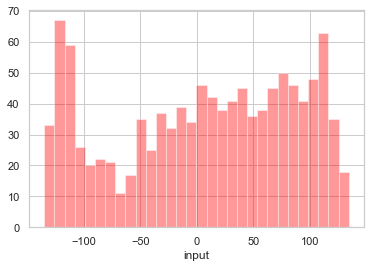

In [47]:
sns.set_style('whitegrid')
sns.distplot(df['input'], kde = False, color ='red', bins = 30)

<AxesSubplot:xlabel='target'>

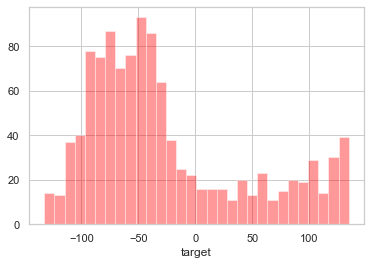

In [48]:
sns.set_style('whitegrid')
sns.distplot(df['target'], kde = False, color ='red', bins = 30)

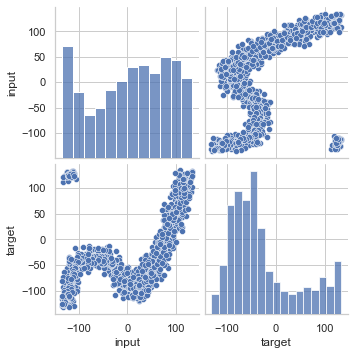

In [50]:
sns.pairplot(df, palette ='coolwarm')

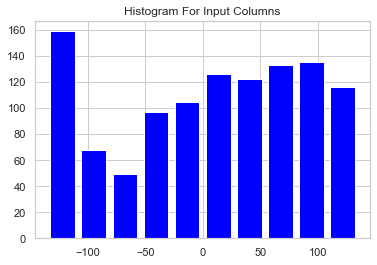

In [52]:
plt.hist(df['input'], rwidth=0.8, color='blue')
plt.title("Histogram For Input Columns")
plt.show()

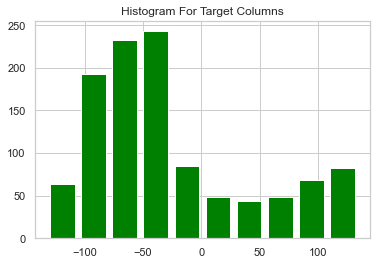

In [54]:
plt.hist(df['target'], rwidth=0.8, color='green')
plt.title("Histogram For Target Columns")
plt.show()

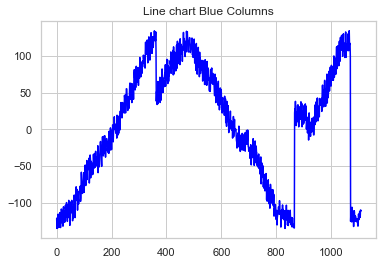

In [57]:
plt.plot(df['input'],color='blue')
plt.title("Line chart Blue Columns")
plt.show()

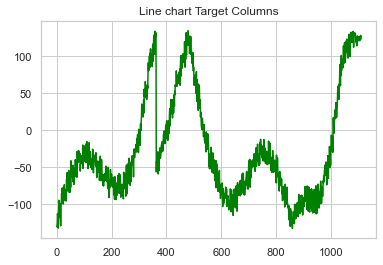

In [56]:
plt.plot(df['target'],color='green')
plt.title("Line chart Target Columns")
plt.show()

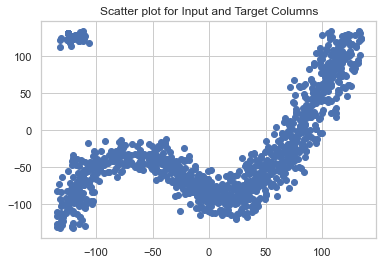

In [59]:
x=np.array(df["input"])
y=np.array(df["target"])
plt.title("Scatter plot for Input and Target Columns")
plt.scatter(x,y)
plt.show()

<AxesSubplot:>

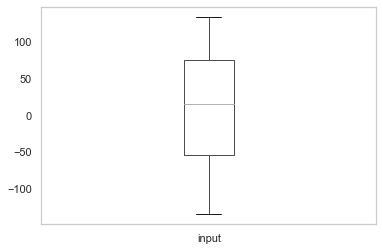

In [63]:
df.boxplot( column =['input'], grid = False)

<AxesSubplot:>

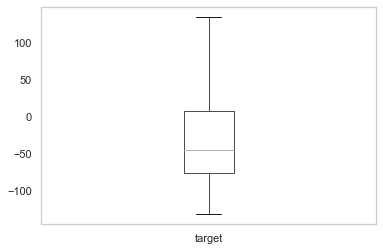

In [64]:
df.boxplot( column =['target'], grid = False)

In [72]:
input=np.asarray(df[["input"]])
target=np.asarray(df["target"])
x_train,x_test,y_train,y_test=train_test_split(input,target,test_size=0.3,random_state=0)
r2 = LinearRegression()
r2.fit(x_train, y_train)

LinearRegression()

In [77]:
x_test

array([[  38.76096865],
       [  36.34061907],
       [-124.3666687 ],
       [ 110.6333313 ],
       [ -60.79869898],
       [-112.3666687 ],
       [-120.3666687 ],
       [   7.22555296],
       [  96.6333313 ],
       [  96.90173948],
       [  60.14399401],
       [-133.1302957 ],
       [  12.6333313 ],
       [   6.2329617 ],
       [ -24.50385739],
       [ -23.5597799 ],
       [ -87.0241036 ],
       [  31.5300926 ],
       [  37.69257656],
       [ -14.43459137],
       [   2.6333313 ],
       [ 117.5945747 ],
       [  38.33481048],
       [  24.60094267],
       [ 108.6333313 ],
       [  82.84174354],
       [  70.61621992],
       [-125.3666687 ],
       [-133.8181748 ],
       [  30.92564812],
       [-112.0184963 ],
       [ 113.9585976 ],
       [-115.3666687 ],
       [  -8.46092297],
       [-112.2579067 ],
       [  79.91468981],
       [  84.23792784],
       [  46.31618757],
       [ -19.3666687 ],
       [ 106.9245151 ],
       [ -28.3666687 ],
       [ 115.253

In [76]:
r2.predict(x_test)

array([-13.80327096, -14.72784135, -76.1178166 ,  13.65187825,
       -51.83493471, -71.53383218, -74.58982179, -25.8497588 ,
         8.30389643,   8.406428  ,  -5.63498303, -79.46551073,
       -23.7839945 , -26.22892737, -37.97035235, -37.60971598,
       -61.85300522, -16.56545622, -14.21139535, -34.12390581,
       -27.60398151,  16.31106419, -13.96606282, -19.21238249,
        12.88788085,   3.03552781,  -1.63460634, -76.4998153 ,
       -79.72827966, -16.79635322, -71.40083078,  14.92212566,
       -72.67982829, -31.84197224, -71.49228524,   1.91739709,
         3.5688684 , -10.91718714, -36.00795294,  12.23511528,
       -39.44594126,  15.41692942, -71.20863657, -35.55628462,
       -47.51788565,   7.40759204, -20.00399051, -34.62280604,
       -35.87042077, -78.02781011, -43.5889436 , -42.11993217,
        18.93091014,  -3.78353492, -27.79579242, -19.16843305,
        -0.48207371, -35.32257823,   6.86998624,  12.80396883,
        -4.44855534,   0.67354478,   4.34664872,   1.04

In [73]:
r2.coef_

array([0.3819987])

In [74]:
r2.intercept_

-28.609910648378563

In [79]:
r2.score(x_test,y_test)

0.22452779262141676

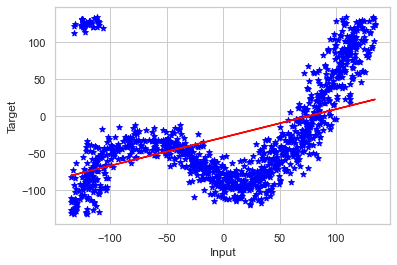

In [75]:
line=r2.coef_*input+r2.intercept_
plt.xlabel("Input")
plt.ylabel("Target")
plt.scatter(input,target,marker='*',color='blue')
plt.plot(input,line,color="red")